# The Indiana Training Program in Public and Population Health Informatics
## Exercise 1 - Data transformation (Recoding the RACE variable)
*Competencies addressed*  
 
 1. Identify as well as access structured electronic data sets (I.1.1)
 2. Transformation of raw data to formats more suitable for downstream use cases (I.1.2)
 3. Acquire skills related to visualizing data to discover patterns (II.1.3) 

 *Learning objectives*  
 At the end of this module the student will be able to do the following:

 1.  Set up the working environment in R  
 2. View the data in R prior to loading the dataset  
 3. Import text delimited datasets in to R  
 4. Summarize data in R  
 5. Recode a variable or a vector using `merge`  
 6. Create basic visualizations to describe the data  
 

These exercises use the patient data from the Type 2 Diabetes dataset. The patient data contains information on the patients, demographics, and various end-diagnoses. This exercise shows how to recode the RACE variable to fewer categories. At the beginning of the exercise, we check our working folder, then load the patient data into R. Once the dataset is loaded we use `head` and `summary` to view the dataset's contents. 

### Familiarize with the environment
Before we start working in R we need to set the working directory. We will then check folder contents and check the patients.csv data file contents without loading it. This is a practical way to inspect large datasets. 

In [1]:
getwd()  #Check the current directory.
setwd("/N/dc2/projects/T15/Sample") #Set the working folder.
list.files()
file.info("patients.csv")
read.csv(file="patients.csv",nrows=10)

[1] "/N/dc2/projects/T15/Sample"

[1] "1-Descriptives.R"                 "2.1-Sampling.R"                  
 [3] "2.2-Pertubration.R"               "3-Exercises 1.R"                 
 [5] "3-Exercises 32 Algorithm Check.R" "T-15 Ex 1 RACE.ipynb"            
 [7] "T-15 Ex 2 NDC.ipynb"              "T-15 Ex 3 .1 BMI.ipynb"          
 [9] "T-15 Ex 3.2 BMI.ipynb"            "T-15 Ex 3.3 BMI.ipynb"           
[11] "Untitled.ipynb"                   "Untitled1.ipynb"                 
[13] "clinical_vars.csv"                "diagnosis.csv"                   
[15] "encounters.csv"                   "ht_summary.csv"                  
[17] "medication.csv"                   "medication_unindc .RDATA"        
[19] "patients.csv"                     "pt.RDATA"                        
[21] "t2d Exercises 1.ipynb"            "unindc.dta"                      
[23] "wt_ht.RDATA"                      "wt_ht_final.RDATA"               
[25] "wt_ht_wide.RDATA"

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
patients.csv,5257050,FALSE,660,2018-09-13 16:38:50,2018-09-14 00:36:40,2018-10-25 09:23:21,498945,1297,ukirbiyi,T15


STUDYID,INDEX_YEAR,INDEX_AGE,GENDER,RACE,T2D_STATUS,CARDIOVASCULAR,NEPHROPATHY,LIVER,ENC_12M_BF,ENC_12M_AF,ENC_YRS_BF,ENC_YRS_AF,BIOBANK
16,1996,76,F,BLACK OR AFRICAN AMERICAN,ICD2 Only,1,NA,NA,4,24,1,2,NA
103,1995,71,M,BLACK OR AFRICAN AMERICAN,ICD2+A1C,1,NA,NA,0,1,0,7,NA
179,2014,71,M,BLACK OR AFRICAN AMERICAN,ICD2 Only,1,NA,NA,93,7,15,2,NA
188,2013,57,M,BLACK OR AFRICAN AMERICAN,A1C Only,1,NA,NA,4,4,11,2,NA
195,2003,78,F,BLACK OR AFRICAN AMERICAN,ICD2 Only,1,1,NA,155,93,8,10,NA
239,1995,47,F,BLACK OR AFRICAN AMERICAN,ICD2+A1C+Meds,1,1,NA,0,7,0,20,1
240,2003,27,M,WHITE,ICD2+A1C+Meds,1,NA,1,2,5,4,13,NA
251,2003,60,F,BLACK OR AFRICAN AMERICAN,ICD2+A1C,1,NA,NA,0,12,4,5,NA
269,1996,56,F,WHITE,ICD2+A1C+Meds,1,NA,NA,3,59,1,8,NA
285,2004,71,F,BLACK OR AFRICAN AMERICAN,ICD2+A1C+Meds,1,NA,NA,2,16,9,12,NA


### Load the patients.csv data file, which has the RACE variable
Run a summary statistics with the patients.csv data file.

In [2]:
patients <- read.csv("patients.csv", header= TRUE)
summary(patients) #This gives quick univariate statistics of the variables (columns).


    STUDYID          INDEX_YEAR     INDEX_AGE     GENDER   
 Min.   :     16   Min.   :1995   Min.   :18.00   F:40993  
 1st Qu.: 358336   1st Qu.:2006   1st Qu.:47.00   M:36915  
 Median : 701734   Median :2009   Median :57.00            
 Mean   : 666051   Mean   :2009   Mean   :56.01            
 3rd Qu.: 981660   3rd Qu.:2012   3rd Qu.:66.00            
 Max.   :1256051   Max.   :2015   Max.   :85.00            
                                                           
                        RACE               T2D_STATUS    CARDIOVASCULAR 
 WHITE                    :39337   A1C Only     : 2069   Min.   :1      
 UNKNOWN/NOT DOCUMENTED   :28692   A1C+Meds     :  589   1st Qu.:1      
 BLACK OR AFRICAN AMERICAN: 6436   ICD2 Only    :41409   Median :1      
 OTHER                    : 1969   ICD2+A1C     : 4305   Mean   :1      
 HISPANIC OR LATINO       :  896   ICD2+A1C+Meds: 7086   3rd Qu.:1      
 ASIAN                    :  261   ICD2+Meds    :12882   Max.   :1      
 (Other) 

### Checking the variable of interest: RACE
While the `summary` function gives some information about the contents of the dataset, the information is often summarized (truncated). See the number of levels given for RACE above.
We will use the `table` function to call all the levels of RACE and their frequencies.
R stores categorical variables as "factor", an object that `table` function needs to order the levels. 
We can check the internal type (class) of a variable using the `class` function. 

In [3]:
as.data.frame(table(patients$RACE)) #Applying data frame makes the table easier to view.

Var1,Freq
AMERICAN INDIAN AND ALASKA NATIVE,62
ASIAN,261
BLACK OR AFRICAN AMERICAN,6436
HISPANIC OR LATINO,896
MULTIRACIAL,74
NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER,177
OTHER,1969
REFUSED,4
UNKNOWN/NOT DOCUMENTED,28692
WHITE,39337


### Shortening RACE variable level names
Sometimes the dataset does not come with our preferred level names. For this example, we will shorten the names of the levels to make it easier to work with. This also makes figures less complex. 
We will create a data table that has the corresponding shortened names for RACE levels. 

In [4]:
#We use the first column from the RACE table, and add the new names manually. 
RACE_levels <- data.frame(as.data.frame(table(patients$RACE))[,1], c("AIAN", "Asian", "Black", "Hispanic", "Multiracial", 
                                   "NHPI", "Other", "Refused", "Unknown", "White"))

colnames(RACE_levels) <-c("RACE", "RACE1") #This changes the column names. 

RACE_levels

RACE,RACE1
AMERICAN INDIAN AND ALASKA NATIVE,AIAN
ASIAN,Asian
BLACK OR AFRICAN AMERICAN,Black
HISPANIC OR LATINO,Hispanic
MULTIRACIAL,Multiracial
NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER,NHPI
OTHER,Other
REFUSED,Refused
UNKNOWN/NOT DOCUMENTED,Unknown
WHITE,White


There are several ways to change level names. Here we use the `merge` function to expand and apply our list to the patient dataset. We will merge by using the RACE variable, this will join the RACE1 variable to the patient dataset and expand it using the RACE column. This process moves the RACE column to left and orders the data by RACE. These do not change the content, however to keep the data tidy, we will reorder the columns and return the order to STUDYID 

In [5]:
patients <- merge(x = patients, y = RACE_levels, by = "RACE", all.x= TRUE) 
patients <- patients[, c(2:14, 1, 15)]  #Re-order the columns.
patients <- patients[order(patients$STUDYID), ]  #Sort the dataset by STUDYID.
as.data.frame(table(patients$RACE1), useNA = "always") #View the table.

Var1,Freq
AIAN,62
Asian,261
Black,6436
Hispanic,896
Multiracial,74
NHPI,177
Other,1969
Refused,4
Unknown,28692
White,39337


### Visualizing RACE1 distribution using barplot
Barplot uses table format for data source. 
We use the `sort` function to order the table by frequency.

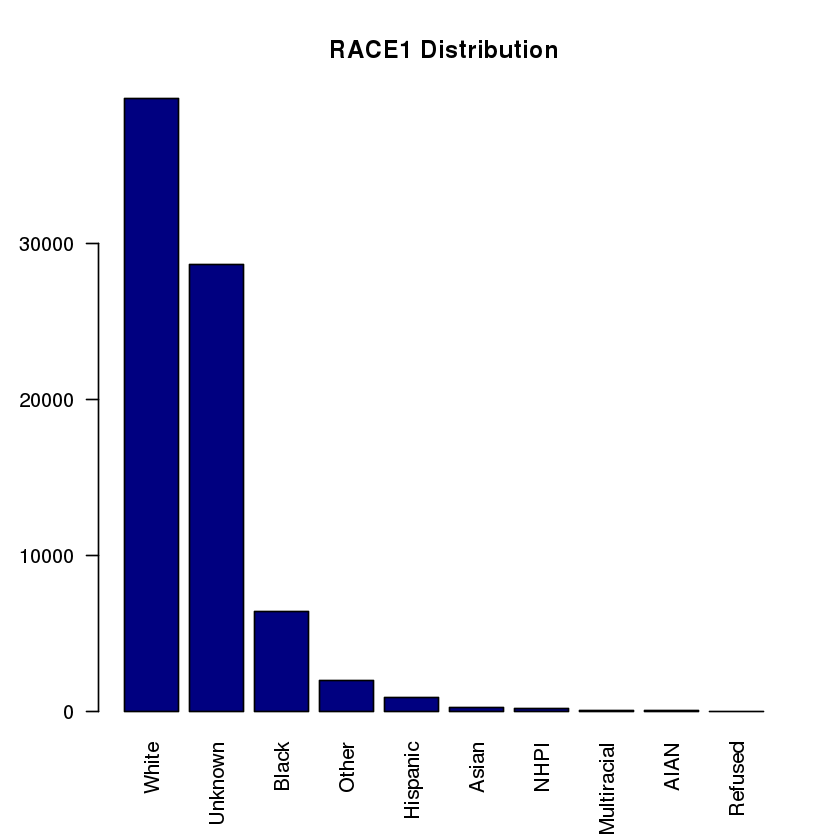

In [6]:
par(las=2) #Make the label text perpendicular to the axis.
barplot(sort(table(patients$RACE1), decreasing = TRUE), main="RACE1 Distribution", 
        horiz=FALSE, col = "Navy")
par(las=0) #Return the label text setting back to the default orientation.  


### A- Recoding RACE1 levels to "OTHER", "BLACK" & "WHITE"
A new column "RACE2" is created for this new category. 
The code below checks whether the RACE value is NOT "WHITE" AND is NOT "BLACK..", 
then returns "OTHER", IF NOT returns the same value as the RACE field. 

`ifelse` function (similar to Excel), assigns values based on the initial logical condition e.g. ifelse(5 < 3, "Yes", "No") returns "No"

*Turning RACE2 value to "character" type removes unused levels hidden in the object. 

In [7]:
#Recoding RACE variable as RACE2 (Joins levels other than White/Black as "OTHER").
patients$RACE2 <- ifelse((patients$RACE1 != "White") & (patients$RACE1 != "Black"), 
                          "Other", as.character(patients$RACE1))
class(patients$RACE2)


[1] "character"

### Pie chart view of RACE2
The table function needs an object (called factor) that can be interpreted as a categorical variable. Turning RACE2 variable class to "factor", makes this process possible. Here we will use the RACE2 table to create a simple pie chart.  


Black Other White 
 6436 32135 39337 

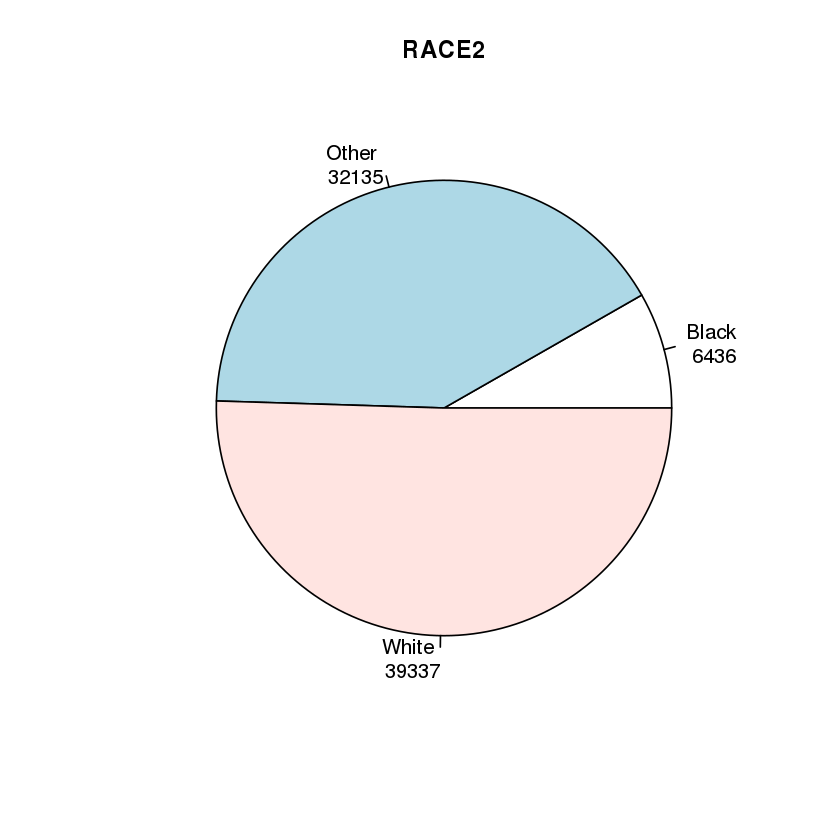

In [8]:
#Let's relevel the new RACE2 variable.
patients$RACE2 <- as.factor(patients$RACE2)
table(patients$RACE2)

#To create a simple Pie Chart use: pie(table(patients$RACE2)).
#To create a pie chart with numbers and title. 
mytable <- table(patients$RACE2)
mylabels <- paste(names(mytable), "\n", mytable, sep=" ")
pie(mytable, labels = mylabels, main = "RACE2" ) 

### B- Grouping White/Black/Unknow vs Other 
We will be using using the `filter` function from dplyr package which is a part of Tidyverse. 

In [9]:
#Load tidyverse (includes dplyr).
#Install it if you have not yet.
# install.packages("tidyverse")
library(tidyverse)


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.0.0     <U+221A> purrr   0.2.5
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.6
<U+221A> tidyr   0.8.1     <U+221A> stringr 1.3.1
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### A new column called "RACE3" is created for the new category
The code below separates data conditioned on the levels of the RACE1 variable. It divides the dataset in 4 separate sub-data, creates RACE3 variable with their corresponding RACE levels and rejoins the datasets. 

*RACE3 value is formed as a "character" type. As mentioned before, we will transform it to "factor" to use it as a categorical variable. 

In [10]:
#The code below separates the dataset by the levels of RACE variable. 
pt_w <- filter(patients, RACE1 == "White")
pt_w$RACE3 <- "White"

pt_b <- filter(patients, RACE1 == "Black")
pt_b$RACE3 <- "Black"

pt_u <- filter(patients, RACE1 == "Unknown")
pt_u$RACE3 <- "Unknown"

# If the field is NOT "WHITE" AND is NOT "BLACK.." AND is NOT "UNKNOWN...", 
# then creates the "OTHER" sub-data.
pt_o <- filter(patients, RACE1 != "White", RACE1 != "Black", RACE1 != "Unknown")
pt_o$RACE3 <- "Other"

patients <- rbind(pt_w, pt_b, pt_u, pt_o)
rm(pt_w, pt_b, pt_u, pt_o)

class(patients$RACE3)
patients$RACE3 <- as.factor(patients$RACE3)
table(patients$RACE3)


[1] "character"


  Black   Other Unknown   White 
   6436    3443   28692   39337 

### Grouped Bar graph view
We are getting the data ready for the barplot function which expects the data in tabular format.
In the exercise below, we are adding the deleted variable "Unknown" to RACE2 factor levels . 
The table (level) order also dictates the bar layout. We are placing the "Unknow" level to the end. 
placing it to the end

In [11]:
#Grouped barplot
#To add the columns to data, their length needs to be the same, so here we add the missing "Unknown" level to RACE2.
levels(patients$RACE2) <- c(levels(patients$RACE2),"Unknown") #Aadding "Unknown" level
table(patients$RACE2)

#Re-order the levels of RACE3 to match RACE2 before combining tables (moving level "Unknown" to the end).
levels(patients$RACE3) <- list("Black"="Black","Other"="Other", "White"="White", "Unknown"="Unknown")
table(patients$RACE3)

RACEcounts <- cbind(table(patients$RACE2), table(patients$RACE3))
colnames(RACEcounts) <- c("RACE2", "RACE3")
RACEcounts  #Final view of the data table.



  Black   Other   White Unknown 
   6436   32135   39337       0 


  Black   Other   White Unknown 
   6436    3443   39337   28692 

,RACE2,RACE3
Black,6436,6436
Other,32135,3443
White,39337,39337
Unknown,0,28692


### Grouped bar graph and setting the options

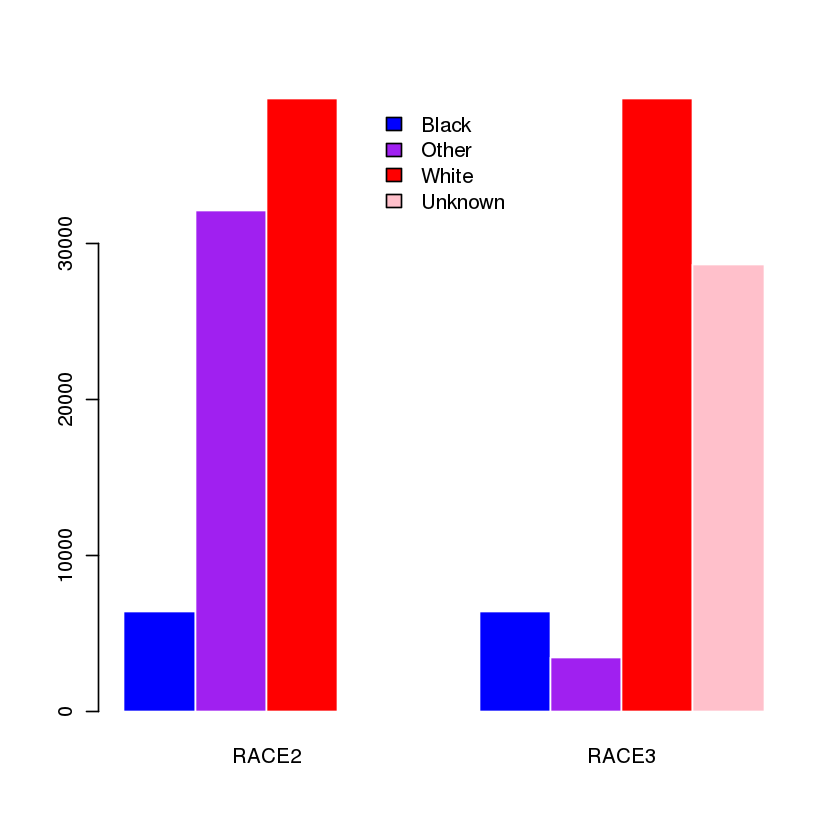

In [12]:
barplot(RACEcounts, col=c("blue","purple","red","pink"), border = "white", 
        beside=TRUE, main="") 
legend("top", fill= c("blue","purple","red","pink"), legend=(rownames(RACEcounts)), bty="n")

### Visualize RACE 1,  RACE2,  & RACE3 with a Sankey plot 

In [13]:
#Creating Sankey plot using alluvial diagrams.
install.packages("alluvial")
library(alluvial)



Installing package into '/gpfs/home/u/k/ukirbiyi/Carbonate/R/x86_64-pc-linux-gnu-library/3.3'
(as 'lib' is unspecified)


### The code below prepares the data for Sankey plot visualization. 
We only need the 3 RACE(1-3) columns we created from the patients dataset. 
The `group_by` function summarizes the RACE(1-3) group counts. 

In [14]:
pt <- select(patients, RACE1, RACE2, RACE3) #Using the select function from Dplyr.
pt <- pt %>% group_by(RACE1, RACE2, RACE3) %>% summarise(n= n()) #Using the group_by & summarise function from Dplyr
#The two lines above can be shortened by further piping (%>%>). 
pt <- pt[ order(pt$n), ]
pt #Final view of the data to be visualized. 


RACE1,RACE2,RACE3,n
Refused,Other,Other,4
AIAN,Other,Other,62
Multiracial,Other,Other,74
NHPI,Other,Other,177
Asian,Other,Other,261
Hispanic,Other,Other,896
Other,Other,Other,1969
Black,Black,Black,6436
Unknown,Other,Unknown,28692
White,White,White,39337


### Saving the patient data with the modified RACE columns
To load the file, use the following code: <br>
`load(file = "patients.RDATA")`

In [17]:
save(patients, file ="patients.RDATA")
file.info("patients.RDATA")
rm(patients, RACE_levels, RACEcounts)

ERROR: Error in save(patients, file = "patients.RDATA"): object 'patients' not found


### Sankey plot with custom colors and other options

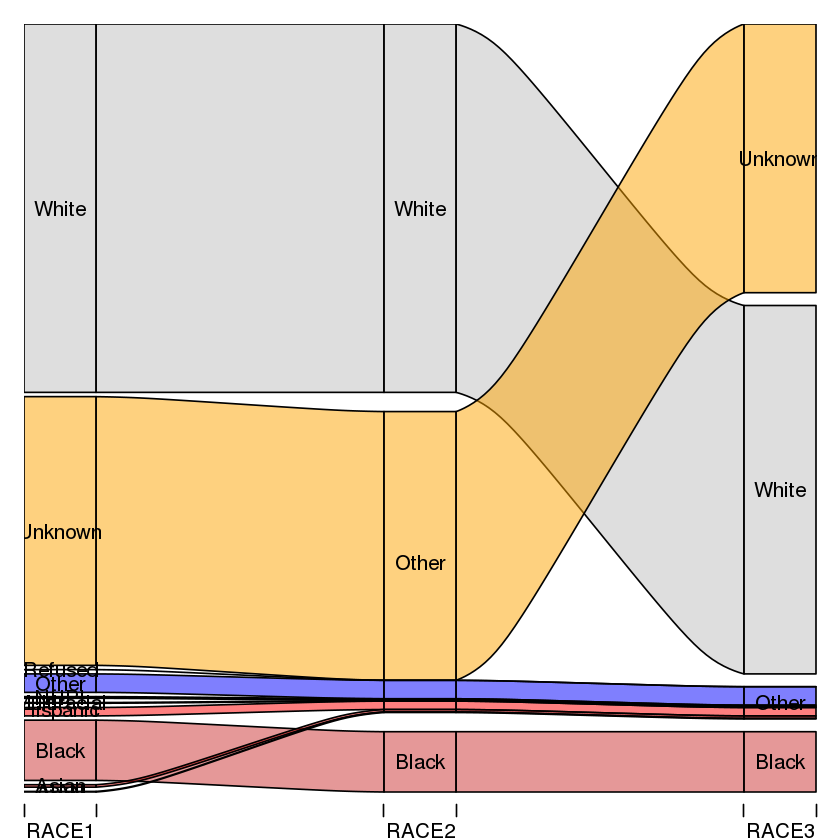

In [16]:
#This code output the graphs with warnings.
#R has the option to supress these warnings:
options(warn = -1)

alluvial(pt[,1:3], freq=pt$n, 
      col= ifelse(pt$RACE1 == "White", "grey",
                            ifelse(pt$RACE1 == "Black", "brown3", 
                                   ifelse(pt$RACE1 == "Unknown", "orange", 
                                         ifelse(pt$RACE1 == "Other", "blue", "red" ) ) )), 
      border = "black", blocks= FALSE)



== END OF EX 1 ==